In [7]:
import pandas as pd
import nltk 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')

df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [4]:
def preprocess(text):
    tokens=word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

In [5]:
df['reviewText'] = df['reviewText'].apply(preprocess)
df

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [9]:
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anonymous\AppData\Roaming\nltk_data...


In [10]:
df['sentiment'] = df['reviewText'].apply(get_sentiment)

df

,reviewText,Positive,sentiment
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df['Positive'], df['sentiment']))

[[ 1131  3636]
 [  576 14657]]


In [12]:
from sklearn.metrics import classification_report

print(classification_report(df['Positive'], df['sentiment']))

              precision    recall  f1-score   support

           0       0.66      0.24      0.35      4767
           1       0.80      0.96      0.87     15233

    accuracy                           0.79     20000
   macro avg       0.73      0.60      0.61     20000
weighted avg       0.77      0.79      0.75     20000



In [13]:
import matplotlib.pyplot as plt

<BarContainer object of 20000 artists>

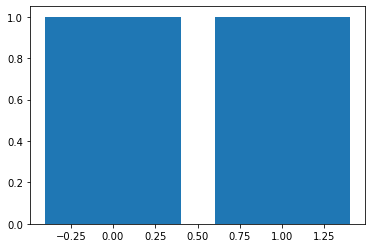

In [15]:
plt.bar(df['Positive'],df['sentiment'])